## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [44]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Random state seed
rseed = 42

# Setting the stying of the Seaborn figure
sns.set_style('darkgrid')

## Load and explore data

In [46]:
# Import the dataset
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [47]:
# Check the shape
df.shape

(167, 10)

167 rows. 9 columns.

In [48]:
# Check datatypes & counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


No empty data for any column. All data types floats or integers.

In [49]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [50]:
# Identify any missing data
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No missing data.

## Preprocessing and Feature Selection

In [51]:
# Drop any non-numeric features (columns)
# axis= 1 means column axis= 0 means row
# inplace= True, removes column without creating a new DataFrame
df.drop('country', axis= 1, inplace= True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


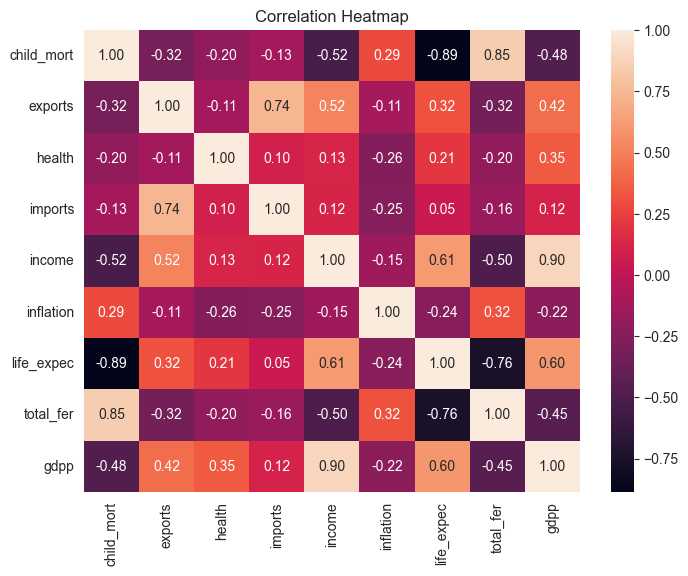

In [52]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

# correlation matrix variable
cm = df.corr()

# shape & figure
plt.figure(figsize= (8, 6))

# seaborn heatmap of correlation_matrix
# sns.heatmap (correlation_matrix variable, annot= True the value in each cell is annotated on the heatmap, fmt= '.2f' set to two decimal places)
sns.heatmap(cm, annot= True, fmt= '.2f')

# title
plt.title("Correlation Heatmap")

# show
plt.show()

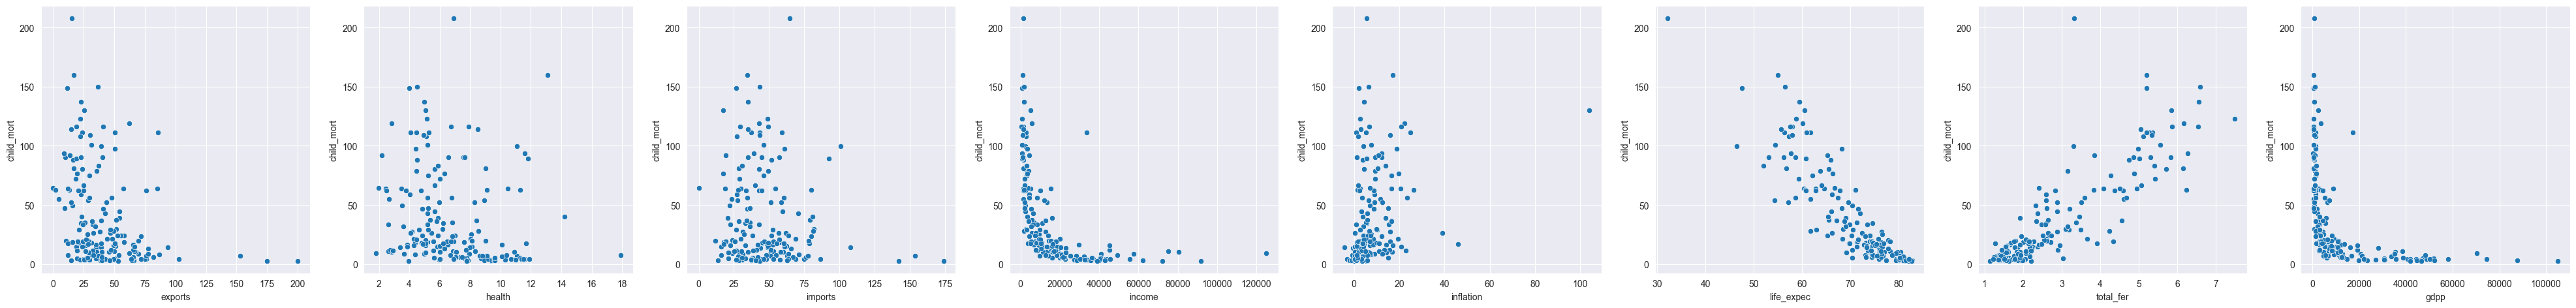

In [53]:
# Explore the continuous independent features against child_mort using scatter plots.

# selecting all indepedent variables
# cf = continuous independent features
cf = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# figure size
plt.figure(figsize= (50, 50))

# scatter plot for each feature against 'child_mort' column
# 8x8 grid of subplots (8 features, 8 subplots)
# .index, helps find the index position of an element
# x= continuous indpedent variables
# y= 'child_mort' column
for feature in cf:
    plt.subplot(8, 8, cf.index(feature) + 1)
    sns.scatterplot(x= df[feature], y= df['child_mort'])

# show
plt.show()

Struggling to work out how to make this more visible. These images can be expanded for better viewing.

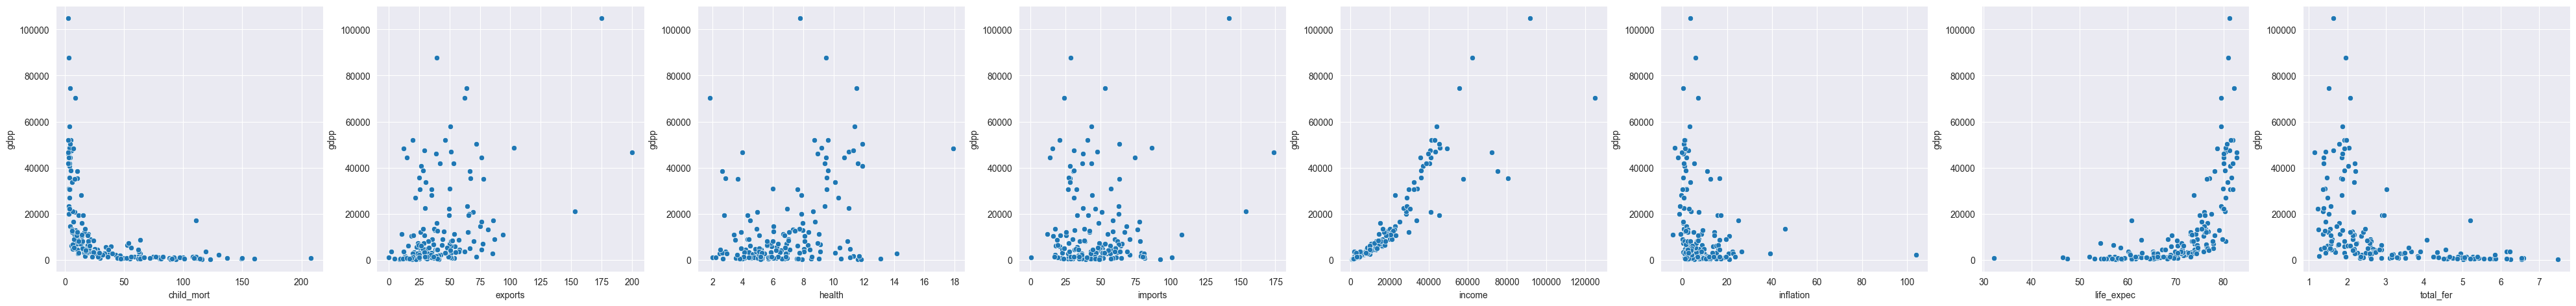

In [54]:
# Explore the continuous independent features against gdpp using scatter plots.

# selecting all indepedent variables
# cf = continuous independent features
cf2 = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']

# figure size
plt.figure(figsize= (50, 50))

# scatter plot for each feature against 'gdpp' column
for feature2 in cf2:
    plt.subplot(8, 8, cf2.index(feature2) + 1)
    sns.scatterplot(x= df[feature2], y= df['gdpp'])

# show
plt.show()

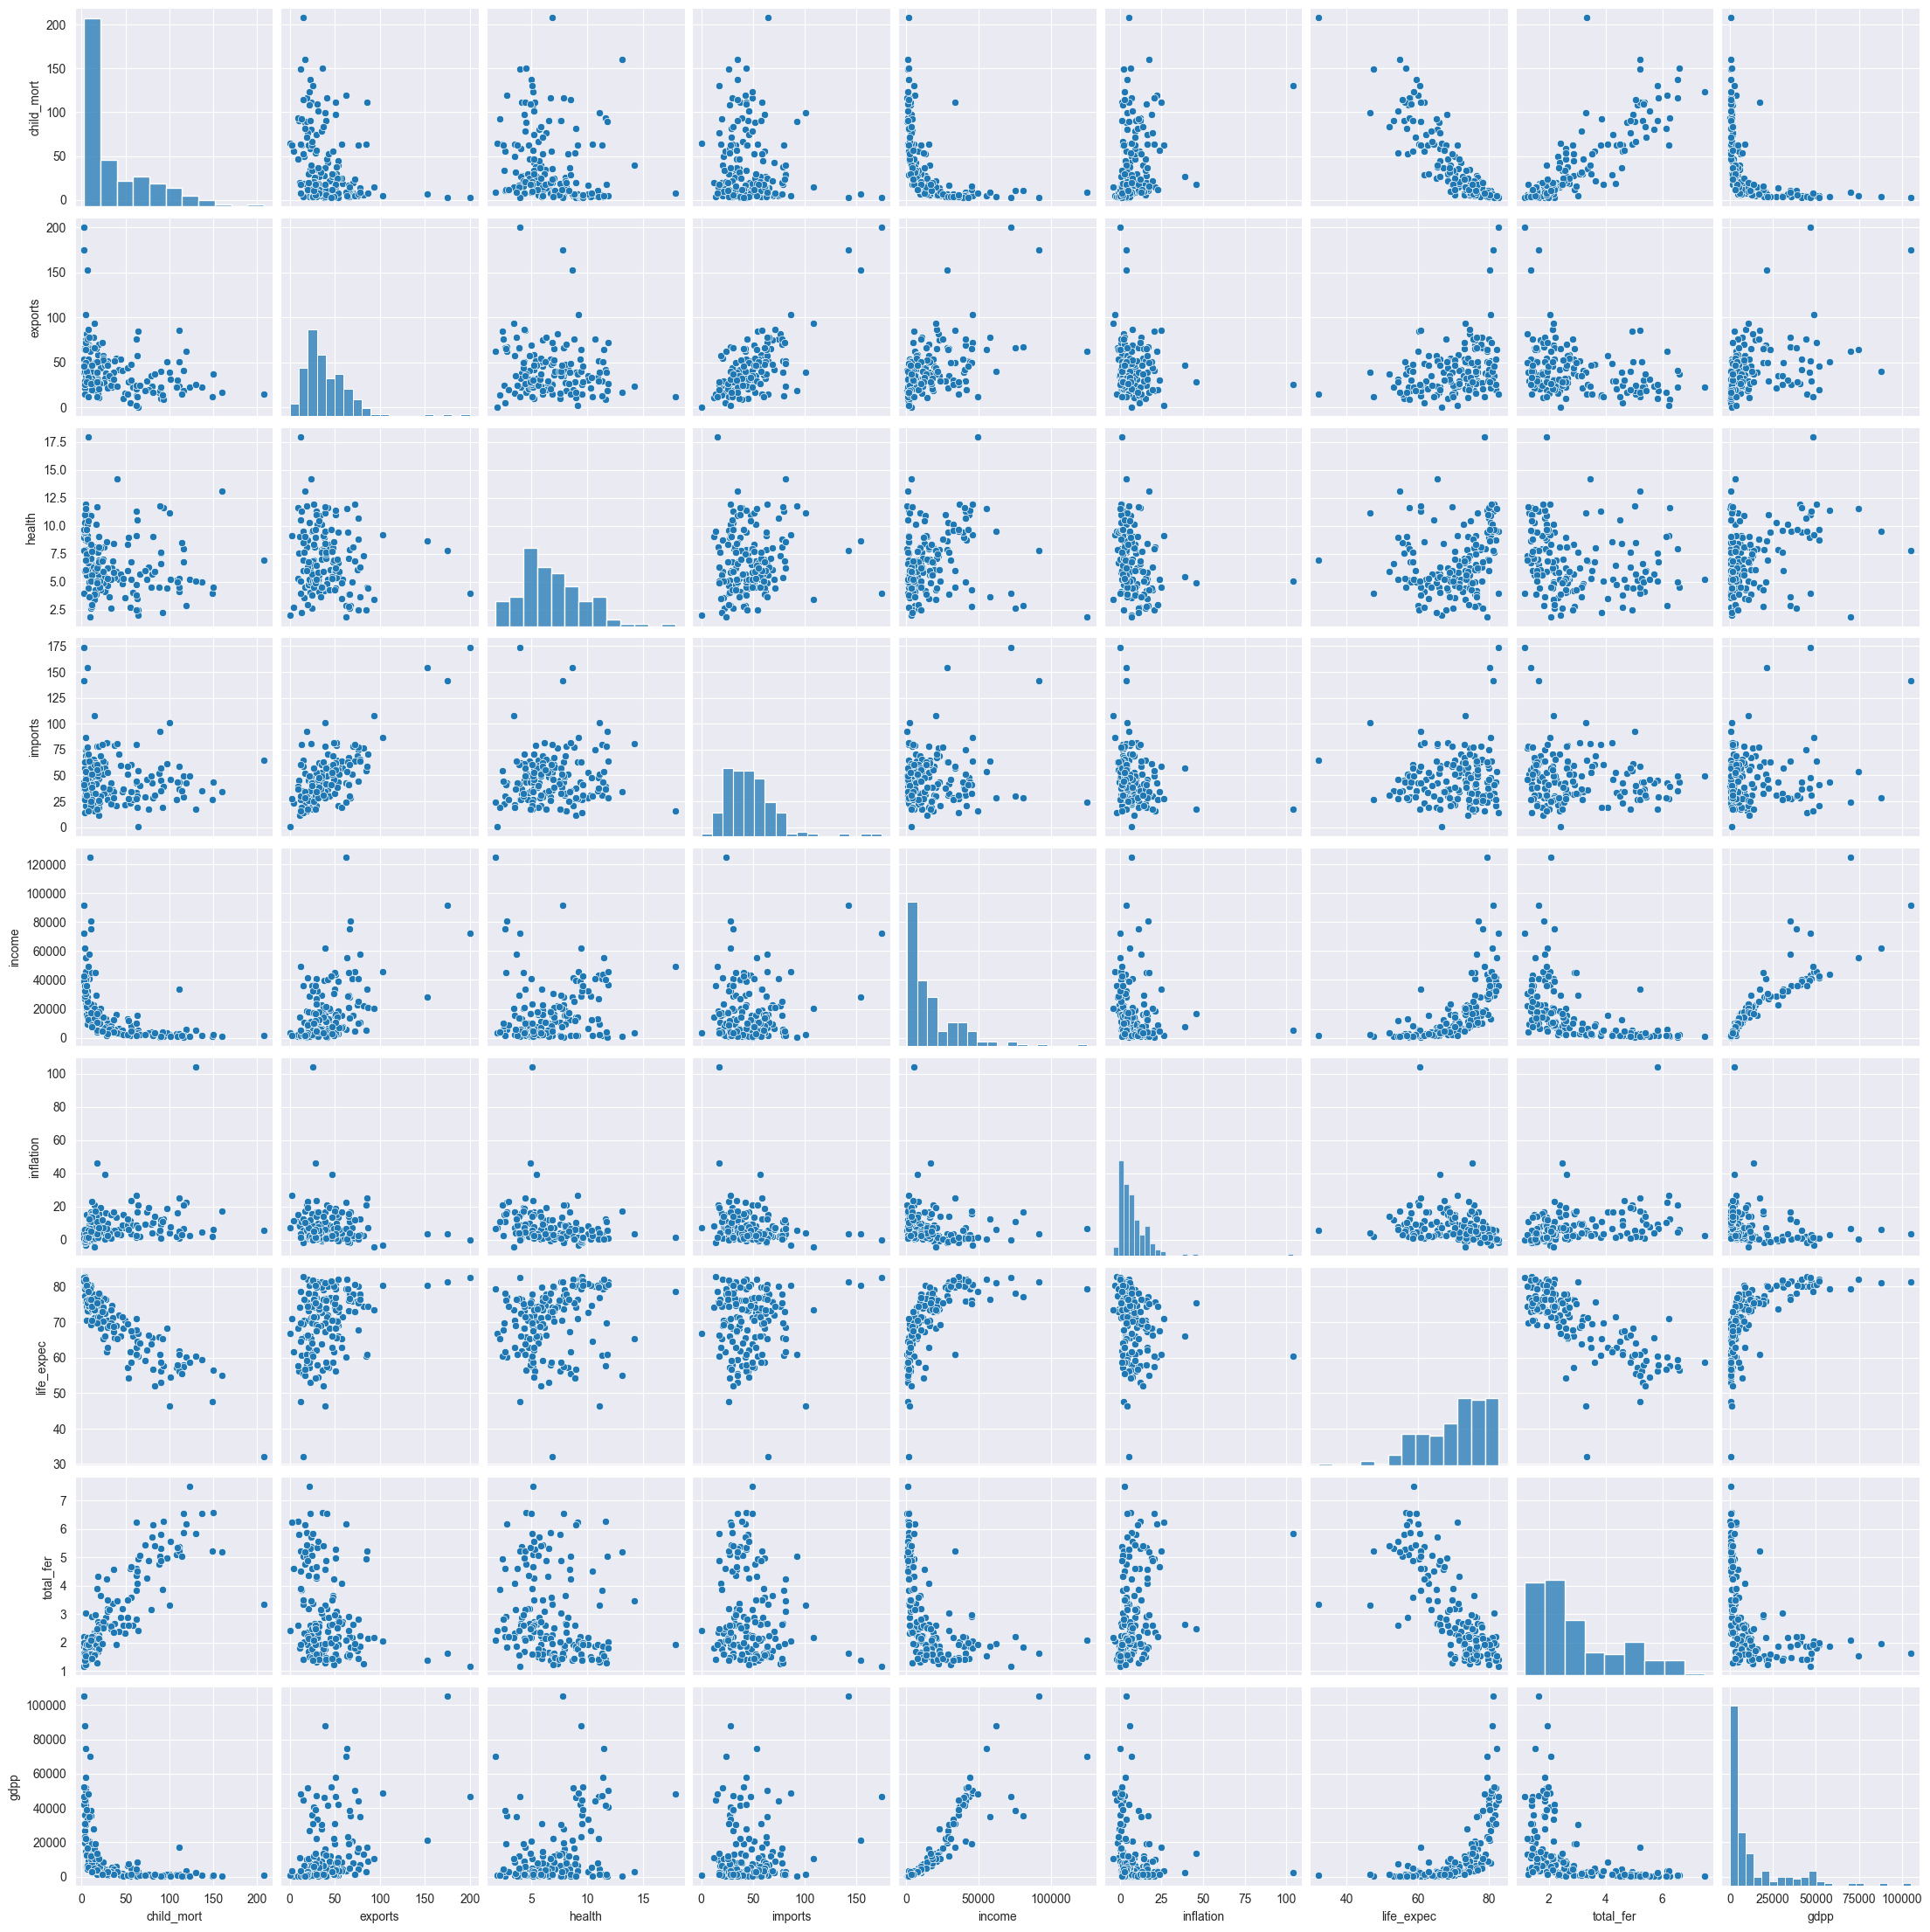

In [55]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(df)

Creating a pair plot is a helpful step in exploring the relationships between features before clustering data. The diagonal plots within a pair plot show the distribution of individual features, which can give insight into how the data is spread for each feature. While distinct peaks in these plots may hint at features with distinct ranges, true separability is better assessed by examining the off-diagonal plots, which show the relationships between pairs of features. These relationships provide a clearer view of how well the data might separate into clusters.

### Scaling the Data

In [56]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

# variable of MinMaxScaler
mms = MinMaxScaler()

# variable for the scaled dataframe
# selecting all rows & all columns
df_scaled = df.iloc[:,:]

# applying the MinMaxScaler
df_scaled = mms.fit_transform(df_scaled)

# turning the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns= df.columns)

# print new DataFrame
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

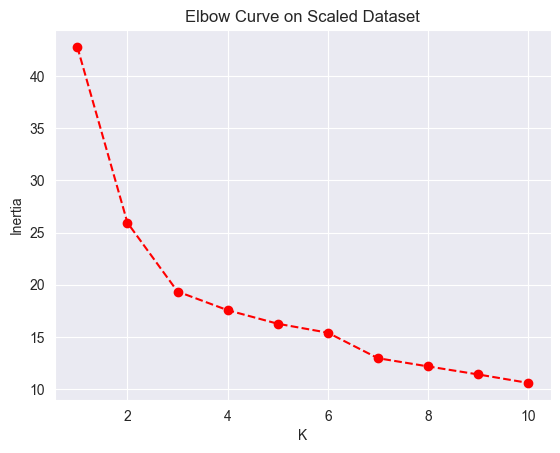

In [57]:
def eval_Kmeans(x, k, r):
    """
    Evaluates the KMeans clustering for a given number of clusters (k)
    and random seed (r), returning the inertia (sum of squared distances
    of samples to their closest cluster center).

    Parameters:
    - x: Data to be clustered.
    - k: Number of clusters.
    - r: Random state for reproducibility.

    Returns:
    - inertia: Sum of squared distances within clusters.
    """
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    """
    Plots the inertia (within-cluster variance) against the number of
    clusters to help determine the optimal number of clusters (the 'elbow' point).

    Parameters:
    - x: Data to be clustered.
    - max_k: Maximum number of clusters to evaluate (default is 10).
    - r: Random state for reproducibility (default is 123).
    """
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars, marker='o', color= 'r',
              linestyle= '--')
    plt.title('Elbow Curve on Scaled Dataset')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled, max_k= 10, r= 42)

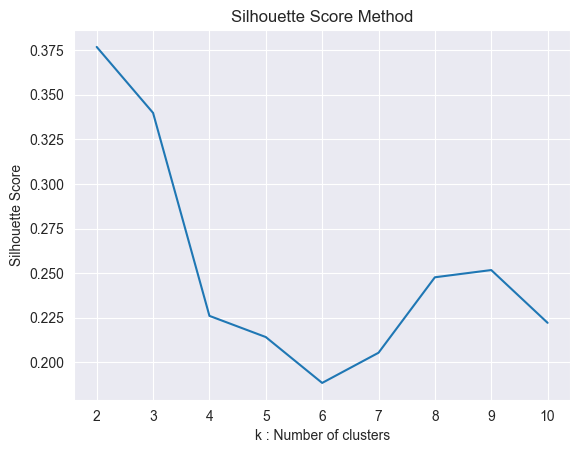

In [58]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

Elbow Method: The optimal value of K corresponds to the "elbow" point, where the inertia starts to decrease more slowly. In this case the 'elbow point' is at 3, as this is where the 'elbow curve' starts to flatten out (decrease slowly).

Silhouette Score: Ranges from -1 to 1, where a value close to 1 indicates that the clusters are well-separated. In this case k=2 clusters has a Silhouette Score closest to 1, whilst k=3 clusters has the second highest Silhouette Score closest to 1. In addition to the 'elbow point' being at 3, I will be setting the value of K to equal 3 (k=3).

In [59]:
# Fitting K-means model
# Remember to set the random_state to rseed
kmeans_model = KMeans(n_clusters= 3, random_state= 42)
kmeans_model.fit(df_scaled)

# cluster assignments for each data point
df_scaled['cluster'] = kmeans_model.labels_

In [60]:
# Count the number of observations in each cluster
df_scaled['cluster'].value_counts()

cluster
0    87
2    45
1    35
Name: count, dtype: int64

In [61]:
# Check model performance with the silhouette coefficient
sil_score = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Coefficient: {sil_score:.4f}")

Silhouette Coefficient: 0.0963


This Silhouette Coefficient is very close to 0, meaning that some data points are close to the boundary between clusters, indicating potential overlap. 

## Predictions

In [62]:
# Add the predicted cluster label column to the original dataframe
# done above
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


## Visualisation of clusters

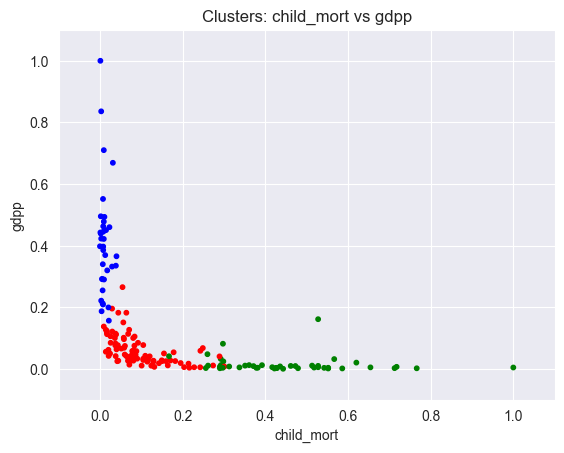

In [63]:
# Visualisation of clusters: child mortality vs gdpp

# assign colours based on the 'cluster' column
cluster_colours = {0: 'red', 1: 'blue', 2: 'green'}

# map the clusters to the respective colours
colours = df_scaled['cluster'].map(cluster_colours)

# plot scatter
# c=, is the colours of the 'cluster' column that was set above, couldve just put c= df_scaled['cluster'] but the default colours werent clear
# s= is the size markings
plt.scatter(x= df_scaled['child_mort'], y= df_scaled['gdpp'], 
            c= colours, s= 10)

# control the limits
# not a necessary step I just think it looks slighty better visually
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

# title & labels
plt.title("Clusters: child_mort vs gdpp")
plt.xlabel('child_mort')
plt.ylabel('gdpp')

# show
plt.show()

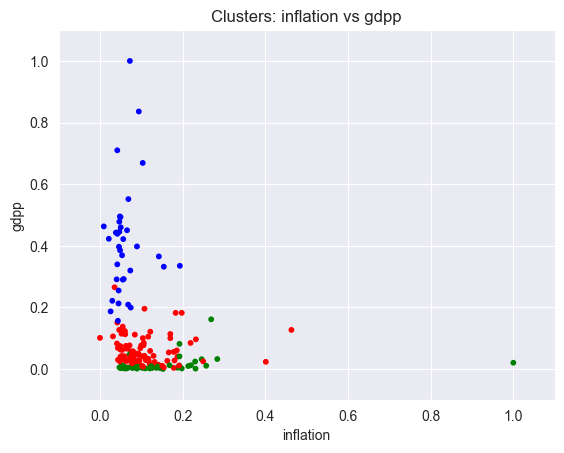

In [64]:
# Visualisation of clusters: inflation vs gdpp

# plot scatter
# c= colours, intialised above
plt.scatter(x= df_scaled['inflation'], y= df_scaled['gdpp'],
             c= colours, s= 10)

# control the limits
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

# title & labels
plt.title("Clusters: inflation vs gdpp")
plt.xlabel('inflation')
plt.ylabel('gdpp')

# show
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

It is clear based upon the 'Clusters: child_mort vs gdpp' scatterplot that the 'green' cluster represents the least developed countries, as the child mortality rate is the highest whilst having the worst GDP per capita. For the opposite reason, the blue cluster represents developed countries. GDP per capita is a good indicator of wealth, health & living standards. Therefore, the 'blue' cluster shows a high GDP per capita resulting in a lower child mortality rate. The 'red' cluster could be catergorised as developing countries as it is in the middle of both green & blue, when it comes to child mortality & GDP per capita.

Insights gained from the 'Clusters: inflation vs gdpp' scatterplot show, and as mentioned previously, that the 'blue' countries are developed. The plot shows high GDP per capita with a moderate increase of inflation. Again, the 'green' cluster represents the undeveloped countries as the GDP per capita is the lowest of the three cluster groups whilst its inflation is generally more than the 'blue' cluster, it even has one with the maxmium inflation rate. It is common for undeveloped countries to have low GDP per capita & high inflation. Once again, the 'red' cluster can be considered as developing countries as it falls in between the two other colours clusters in terms of GDP per capita, in this phase it sits somewhere between the undeveloped and developed stages.